In [ ]:
import pandas as pd
import numpy as np
#https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset
link = "https://raw.githubusercontent.com/knedderm/dsproject/main/cars_datasets.csv"
df = pd.read_csv(link)
years = df["year"] >= 2000
df = df[years]

peterbilt = df["brand"] == "peterbilt"
df = df[~peterbilt]
harley = df["brand"] == "harley-davidson"
df = df[~harley]
heartland = df["brand"] == "heartland"
df = df[~heartland]

clean_title = df["title_status"] == "clean vehicle"
df = df[clean_title]

df = df[df["price"] > 0]
# removing motorcycles (harley), semis(peterbilt), and rvs(heartland) from the data, since we want to primarily focus on cars for everyday use
# removed years before 2000 to remove outliers such as the 30,000+ 1973 vehicle that don't work with the data
# removed prices of 0 or less
labels = df["price.1"]
df = df[["price", "brand", "year", "mileage"]]
df

,price,brand,year,mileage
0,6300,toyota,2008,274117
1,2899,ford,2011,190552
2,5350,dodge,2018,39590
3,25000,ford,2014,64146
4,27700,chevrolet,2018,6654
...,...,...,...,...
2494,7800,nissan,2019,23609
2495,9200,nissan,2018,34553
2496,9200,nissan,2018,31594
2497,9200,nissan,2018,32557


<Axes: xlabel='X', ylabel='logAcc'>

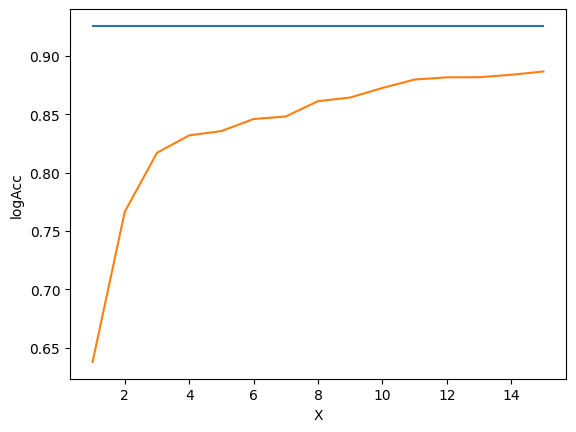

In [ ]:
logReg = pd.DataFrame()
logReg["X"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
logReg["logAcc"] = .9255
logReg["flAcc"] = [.6379, .7664, .8169, .8318, .8355, .8458, .848, .8611, .8642, .8724, .8796, .8815, .8816, .8837, .8865]
logReg.plot(kind="line", x="X", y="flAcc", title="FL Logarithmic Regression, 5 clients", grid=True, xlabel="roud")

<Axes: xlabel='mileage', ylabel='price'>

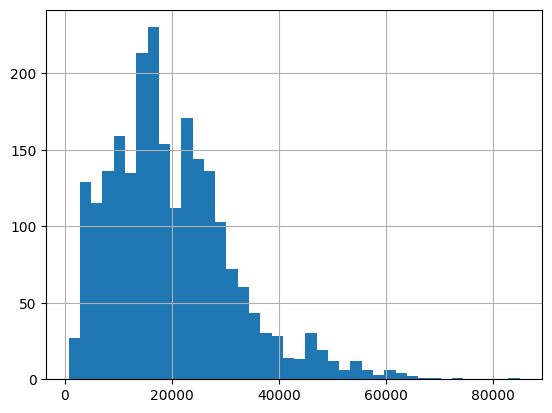

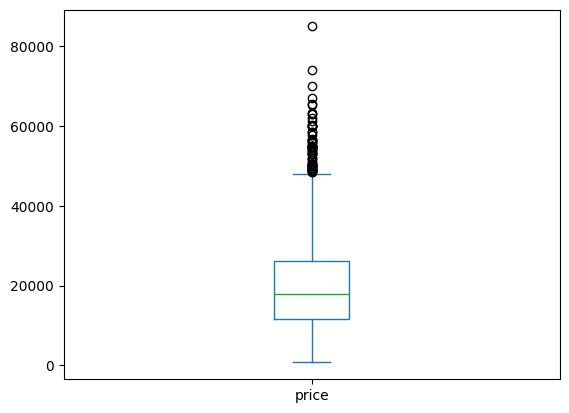

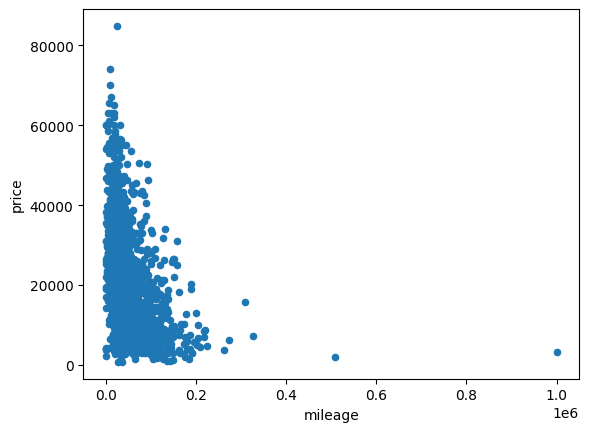

In [ ]:

milesCost = df[["price", "mileage"]]
milesCost["price"].hist(bins=40)
milesCost.plot(kind="box", x = "mileage", y="price")
milesCost.plot(kind="scatter", x = "mileage", y="price")

<Axes: title={'center': 'Vehicle Cost vs. Mileage Lost'}, xlabel='mileage', ylabel='price'>

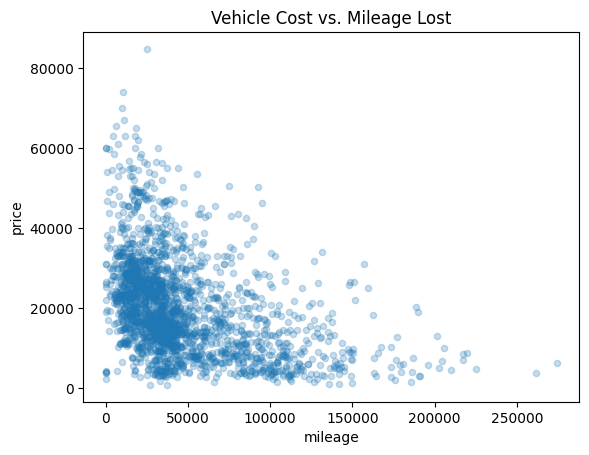

In [ ]:
restrictedDF = df[df["mileage"] < 300000]
restrictedDF.plot(kind="scatter", x="mileage", y="price", alpha=0.25, title="Vehicle Cost vs. Mileage Lost")

<ipython-input-4-52d7c7da481e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year = df.groupby("year").mean()


<Axes: title={'center': 'Average Car Price by Vehicle Year'}, xlabel='year'>

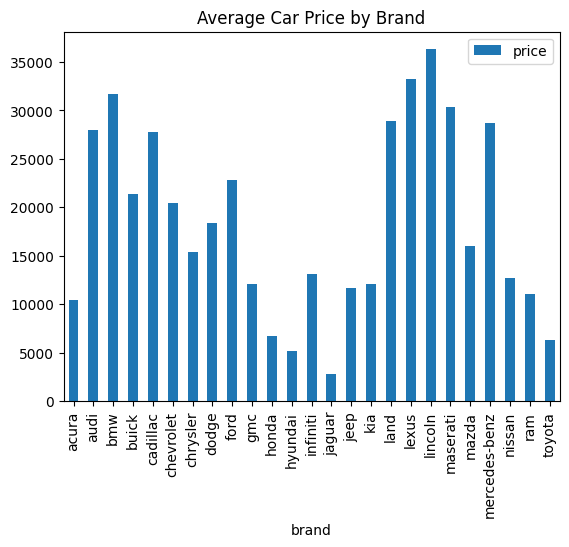

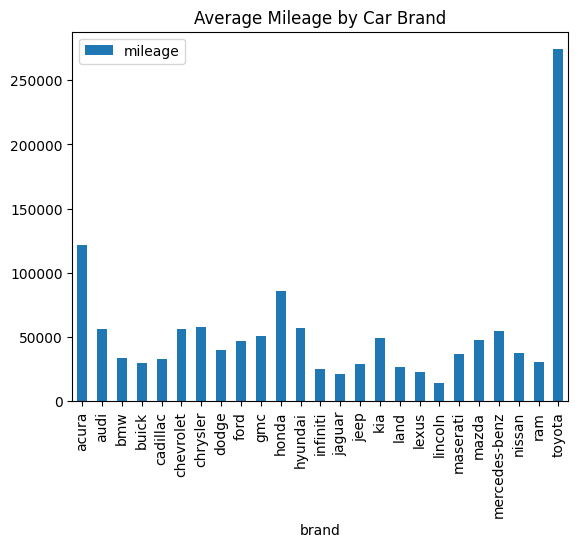

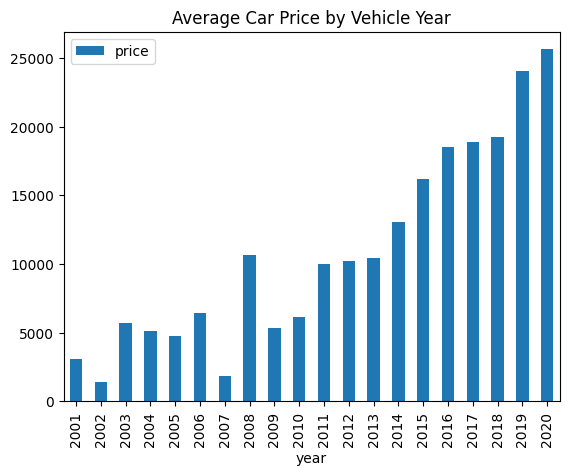

In [ ]:
avg = df.groupby("brand").mean()
year = df.groupby("year").mean()
avg.plot(kind="bar", y="price", title="Average Car Price by Brand")
avg.plot(kind="bar", y="mileage", title="Average Mileage by Car Brand")
year.plot(kind="bar", y="price", title="Average Car Price by Vehicle Year")

In [ ]:
corr = df.corr()
corr.style.background_gradient()
#df.groupby("brand").mean()

<ipython-input-5-f15c09d67f02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,price,year,mileage
price,1.000000,0.348239,-0.365561
year,0.348239,1.000000,-0.665161
mileage,-0.365561,-0.665161,1.000000


In [ ]:
def label(value):
    if value <= 42.9:
      return "cheap"

    elif value <= 73.6:
      return "fair"

    else:
      return "expensive"

labels = labels.apply(label)
print(labels)
#42.9
#73.6

0       expensive
1            fair
2           cheap
3       expensive
4           cheap
          ...    
2494        cheap
2495        cheap
2496        cheap
2497        cheap
2498        cheap
Name: price.1, Length: 2328, dtype: object


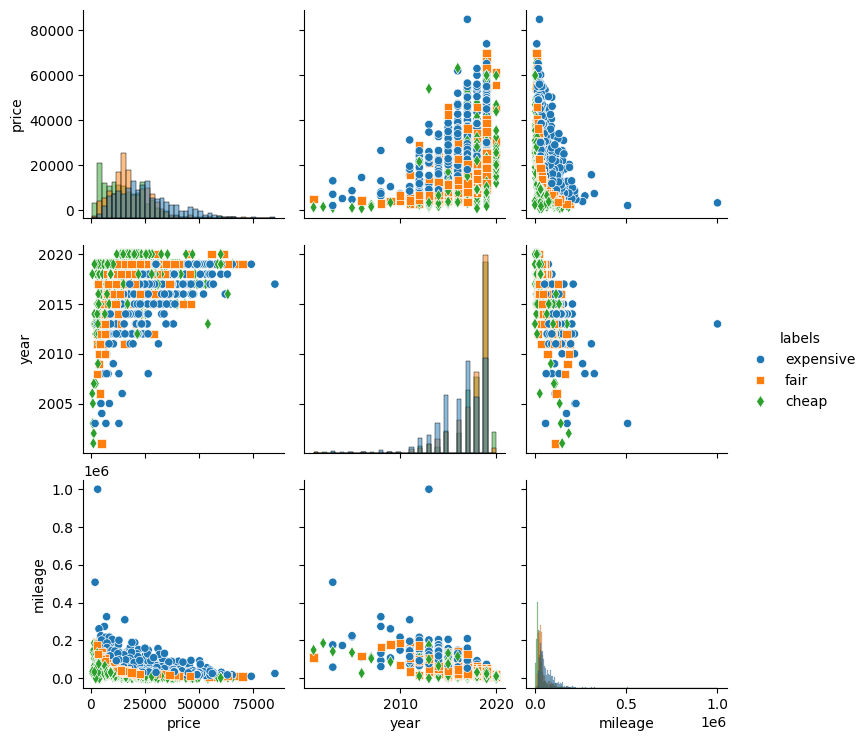

In [ ]:
import seaborn as sns
df["labels"] = labels
sns.pairplot(df, hue="labels", markers=["o", "s", "d"], diag_kind="hist")

In [ ]:
brand_to_num = {"acura": 10.4, "audi": 27.95, "bmw": 31.714, "buick": 21.358, "cadillac": 27.712, "chevrolet": 20.397, "chrysler": 15.384,
                "dodge": 18.428, "ford": 22.829, "gmc": 12.055, "honda": 6.684,
 "hyundai": 5.203, "infiniti": 13.098, "jaguar": 2.8, "jeep": 11.706, "kia": 12.050, "land": 28.9, "lexus": 33.22, "lincoln": 36.3,
 "maserati": 30.3, "mazda": 16, "mercedes-benz": 28.704, "nissan": 12.74, "ram": 11.05, "toyota": 6.3}
df["brand"] = df["brand"]
df["brand"] = df["brand"].map(brand_to_num)
df

,price,brand,year,mileage,labels
0,6300,6.300,2008,274117,expensive
1,2899,22.829,2011,190552,fair
2,5350,18.428,2018,39590,cheap
3,25000,22.829,2014,64146,expensive
4,27700,20.397,2018,6654,cheap
...,...,...,...,...,...
2494,7800,12.740,2019,23609,cheap
2495,9200,12.740,2018,34553,cheap
2496,9200,12.740,2018,31594,cheap
2497,9200,12.740,2018,32557,cheap


Train test split Accuracy (knn3): 0.9518900343642611
Train test split Accuracy (knn5): 0.9484536082474226
Train test split Accuracy (Dec Tree): 0.9518900343642611
Train test split Accuracy (log): 0.7027491408934707


Cross Val Accuracy (knn3): 0.9441515529096867
Cross Val Accuracy (knn5): 0.9467331210485025
Cross Val Accuracy (Dec Tree): 0.9222326826341778
Cross Val Accuracy (log): 0.6821043887581336



Train test split Accuracy (knn6): 0.9536082474226805


Cross Val Accuracy (knn6): 0.9493100742996908


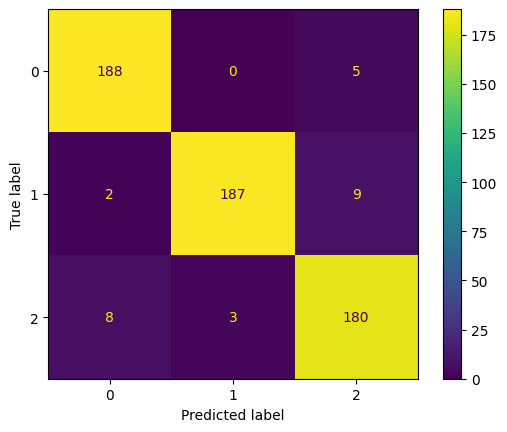

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y = labels
X = df[["price", "brand", "year", "mileage"]]
trainX, testX, trainY, testY = train_test_split(X, y)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
decTree = DecisionTreeClassifier()
log = LogisticRegression()

knn3.fit(trainX, trainY)
knn5.fit(trainX, trainY)
decTree.fit(trainX, trainY)
log.fit(trainX, trainY)

knn3_pred = knn3.predict(testX)
knn5_pred = knn5.predict(testX)
decTree_pred = decTree.predict(testX)
log_pred = log.predict(testX)

print("Train test split Accuracy (knn3): " + str(accuracy_score(y_true=testY, y_pred=knn3_pred)))
print("Train test split Accuracy (knn5): " + str(accuracy_score(y_true=testY,y_pred= knn5_pred)))
print("Train test split Accuracy (Dec Tree): " + str(accuracy_score(y_true=testY, y_pred=decTree_pred)))
print("Train test split Accuracy (log): " + str(accuracy_score(y_true=testY, y_pred=log_pred)))

print("\n")

print("Cross Val Accuracy (knn3): " + str(cross_val_score(knn3, X, y, cv=5).mean()))
print("Cross Val Accuracy (knn5): " + str(cross_val_score(knn5, X, y, cv=5).mean()))
print("Cross Val Accuracy (Dec Tree): " + str(cross_val_score(decTree, X, y, cv=5).mean()))
print("Cross Val Accuracy (log): " + str(cross_val_score(log, X, y, cv=5).mean()))
print("\n\n")

knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(trainX, trainY)
knn6_pred = knn6.predict(testX)
matrix = confusion_matrix(testY, knn6_pred)
print("Train test split Accuracy (knn6): " + str(accuracy_score(y_true=testY, y_pred=knn6_pred)))

print("\n")
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X, y)
print("Cross Val Accuracy (knn6): " + str(cross_val_score(knn6, X, y, cv=5).mean()))
#Best model varies but the KNN loop suggests 6 is the best value to use.
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

In [ ]:
max = 0
max_knn = 0
for i in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X, y)
  accuracy = cross_val_score(knn, X, y, cv=5).mean()
  if accuracy > max:
    max = accuracy
    max_knn = i
print(max_knn)
#optimal KNN is 6.

6


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(testY, knn6_pred)
print(report)

              precision    recall  f1-score   support

       cheap       0.95      0.97      0.96       193
   expensive       0.98      0.94      0.96       198
        fair       0.93      0.94      0.94       191

    accuracy                           0.95       582
   macro avg       0.95      0.95      0.95       582
weighted avg       0.95      0.95      0.95       582

